In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import pickle
import time
import datetime

import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv("final_s&p500_df.csv")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378557 entries, 0 to 378556
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Ticker                    378557 non-null  object 
 1   Date                      378557 non-null  object 
 2   Open                      378557 non-null  float64
 3   High                      378557 non-null  float64
 4   Low                       378557 non-null  float64
 5   Close                     378557 non-null  float64
 6   Adj Close                 378557 non-null  float64
 7   Volume                    378557 non-null  int64  
 8   Holder                    377801 non-null  object 
 9   Date_Holder_bought_stock  377801 non-null  object 
 10  Holder_%_in_company       352097 non-null  float64
 11  Industry                  321445 non-null  object 
 12  Dividend_Value            378557 non-null  float64
dtypes: float64(7), int64(1), object(5)
memory us

In [16]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Holder,Date_Holder_bought_stock,Holder_%_in_company,Industry,Dividend_Value
0,CSCO,2020-01-02,48.060001,48.419998,47.880001,48.419998,43.408047,16708100,Vanguard Group Inc,2023-06-29,NaN,Communication Equipment,0.0
1,CSCO,2020-01-03,47.910000,48.139999,47.480000,47.630001,42.699821,15577400,Vanguard Group Inc,2023-06-29,NaN,Communication Equipment,0.0
2,CSCO,2020-01-06,47.139999,47.820000,47.009998,47.799999,42.852222,22183600,Vanguard Group Inc,2023-06-29,NaN,Communication Equipment,0.0
3,CSCO,2020-01-07,47.720001,47.720001,47.099998,47.490002,42.574314,16501900,Vanguard Group Inc,2023-06-29,NaN,Communication Equipment,0.0
4,CSCO,2020-01-08,46.970001,47.790001,46.810001,47.520000,42.601200,25175900,Vanguard Group Inc,2023-06-29,NaN,Communication Equipment,0.0


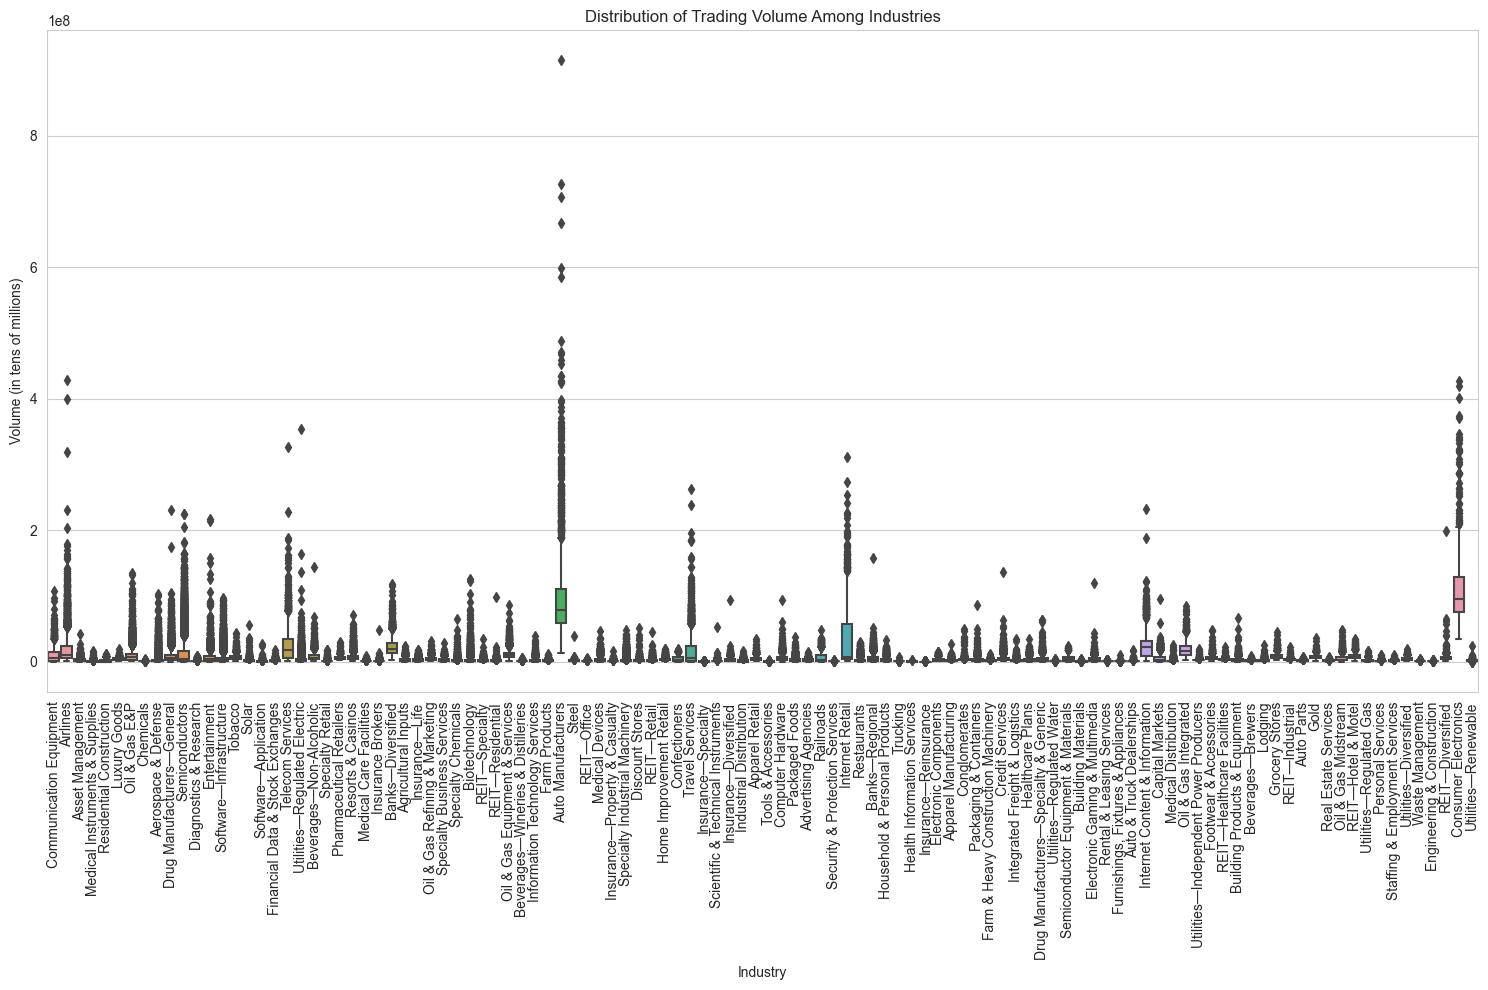

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set_style("whitegrid")

# Plotting the distribution of trading volume among different industries
plt.figure(figsize=(15, 10))
sns.boxplot(x="Industry", y="Volume", data=df)
plt.xticks(rotation=90)
plt.title("Distribution of Trading Volume Among Industries")
plt.ylabel("Volume (in tens of millions)")
plt.xlabel("Industry")
plt.tight_layout()
plt.show()


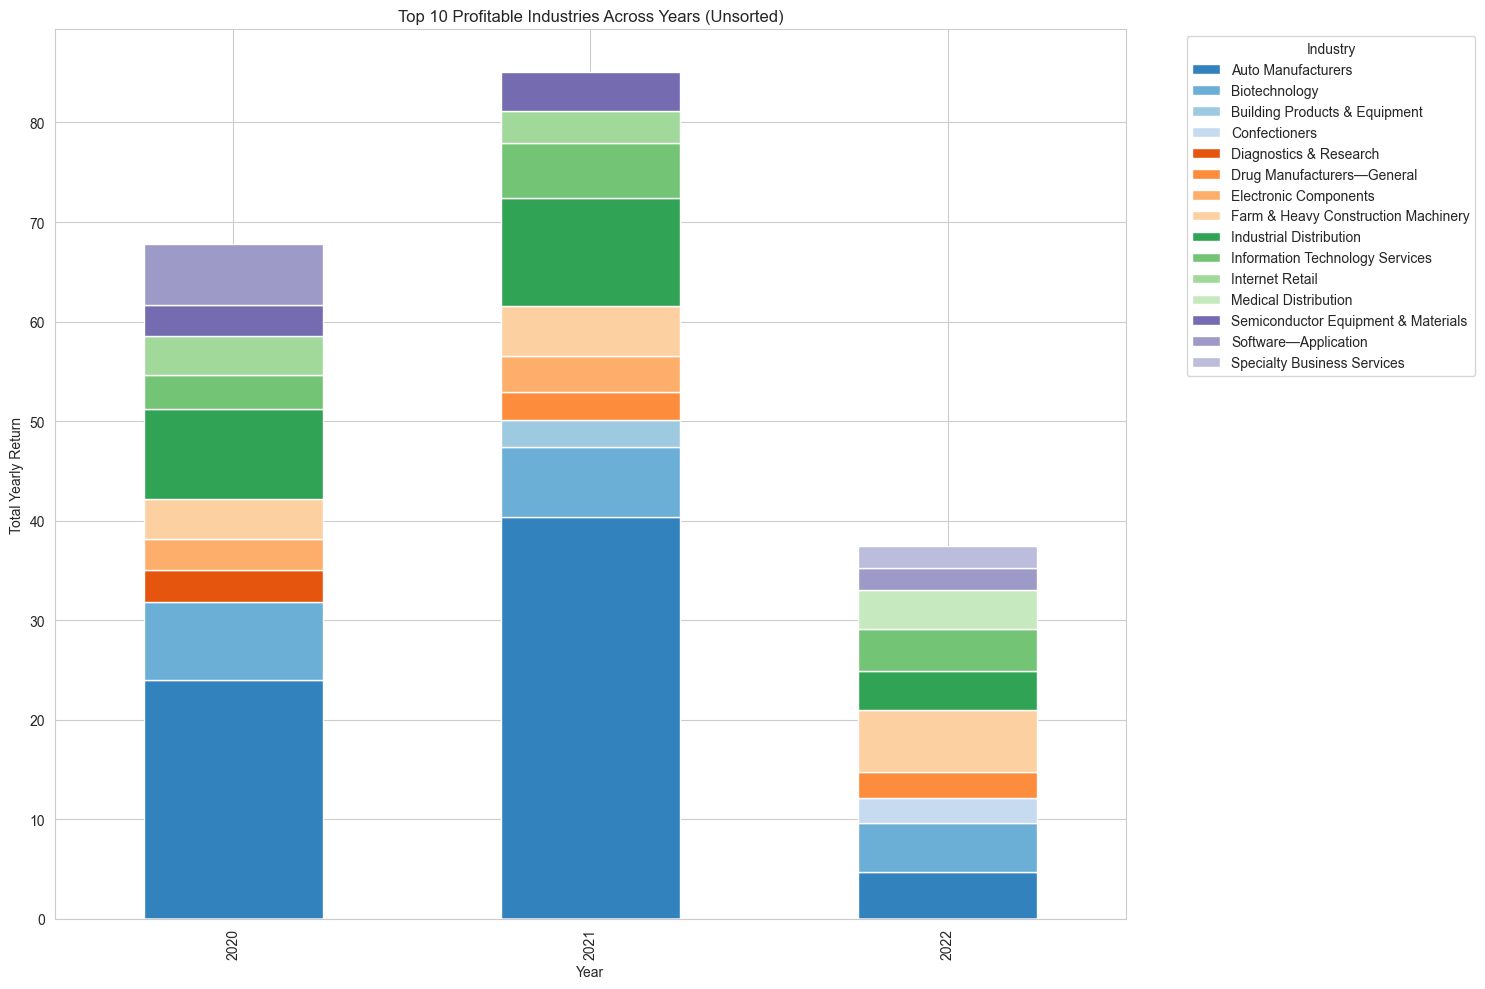

,Year,Industry,Yearly_Return
0,2020,Auto Manufacturers,23.970629
1,2021,Auto Manufacturers,40.345069
2,2022,Farm & Heavy Construction Machinery,6.268761


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataframe is named "df" and there's a "Date" column from which we can extract the year
df['Year'] = pd.to_datetime(df['Date']).dt.year

# Calculating the yearly return for each industry within each year
yearly_returns = df.groupby(['Year', 'Industry']).apply(lambda x: (x['Close'].iloc[-1] - x['Close'].iloc[0]) / x['Close'].iloc[0]).reset_index()
yearly_returns.columns = ['Year', 'Industry', 'Yearly_Return']

# Selecting the top 10 industries for each year
top_10_industries_each_year = yearly_returns.groupby('Year').apply(lambda x: x.nlargest(10, 'Yearly_Return')).reset_index(drop=True)

# Pivoting the data to get the top 10 industries as columns and years as rows
stacked_data_top_10 = top_10_industries_each_year.pivot(index='Year', columns='Industry', values='Yearly_Return')
stacked_data_top_10 = stacked_data_top_10.fillna(0)  # Filling NaN values with 0

# Plotting the stacked bar chart for the top 10 industries without sorting
plt.figure(figsize=(15, 10))
stacked_data_top_10.plot(kind='bar', stacked=True, figsize=(15, 10), color=sns.color_palette("tab20c", len(stacked_data_top_10.columns)), ax=plt.gca())
plt.title('Top 10 Profitable Industries Across Years (Unsorted)')
plt.ylabel('Total Yearly Return')
plt.xlabel('Year')
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

top_industry_each_year


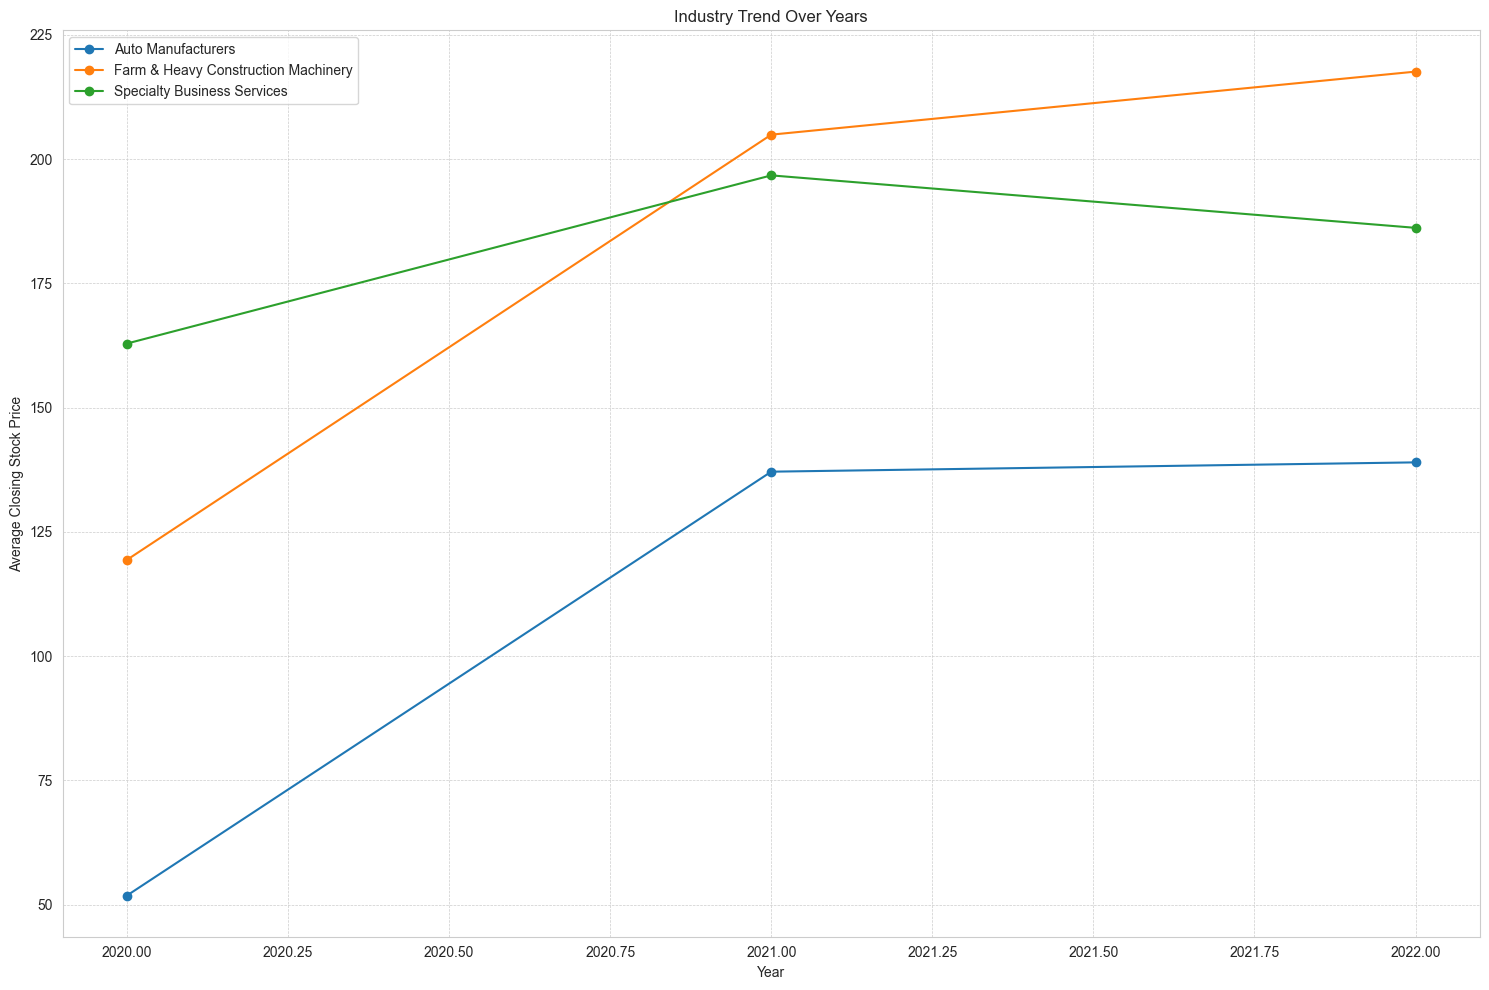

In [22]:
# Selecting a few notable industries for demonstration (can be customized)
selected_industries = ["Auto Manufacturers", "Farm & Heavy Construction Machinery", "Specialty Business Services"]

# Calculating the average closing stock price for the selected industries over the years
avg_closing_price = df[df['Industry'].isin(selected_industries)].groupby(['Year', 'Industry'])['Close'].mean().unstack()

# Plotting the trend
plt.figure(figsize=(15, 10))
for industry in selected_industries:
    plt.plot(avg_closing_price.index, avg_closing_price[industry], label=industry, marker='o')

plt.title('Industry Trend Over Years')
plt.ylabel('Average Closing Stock Price')
plt.xlabel('Year')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


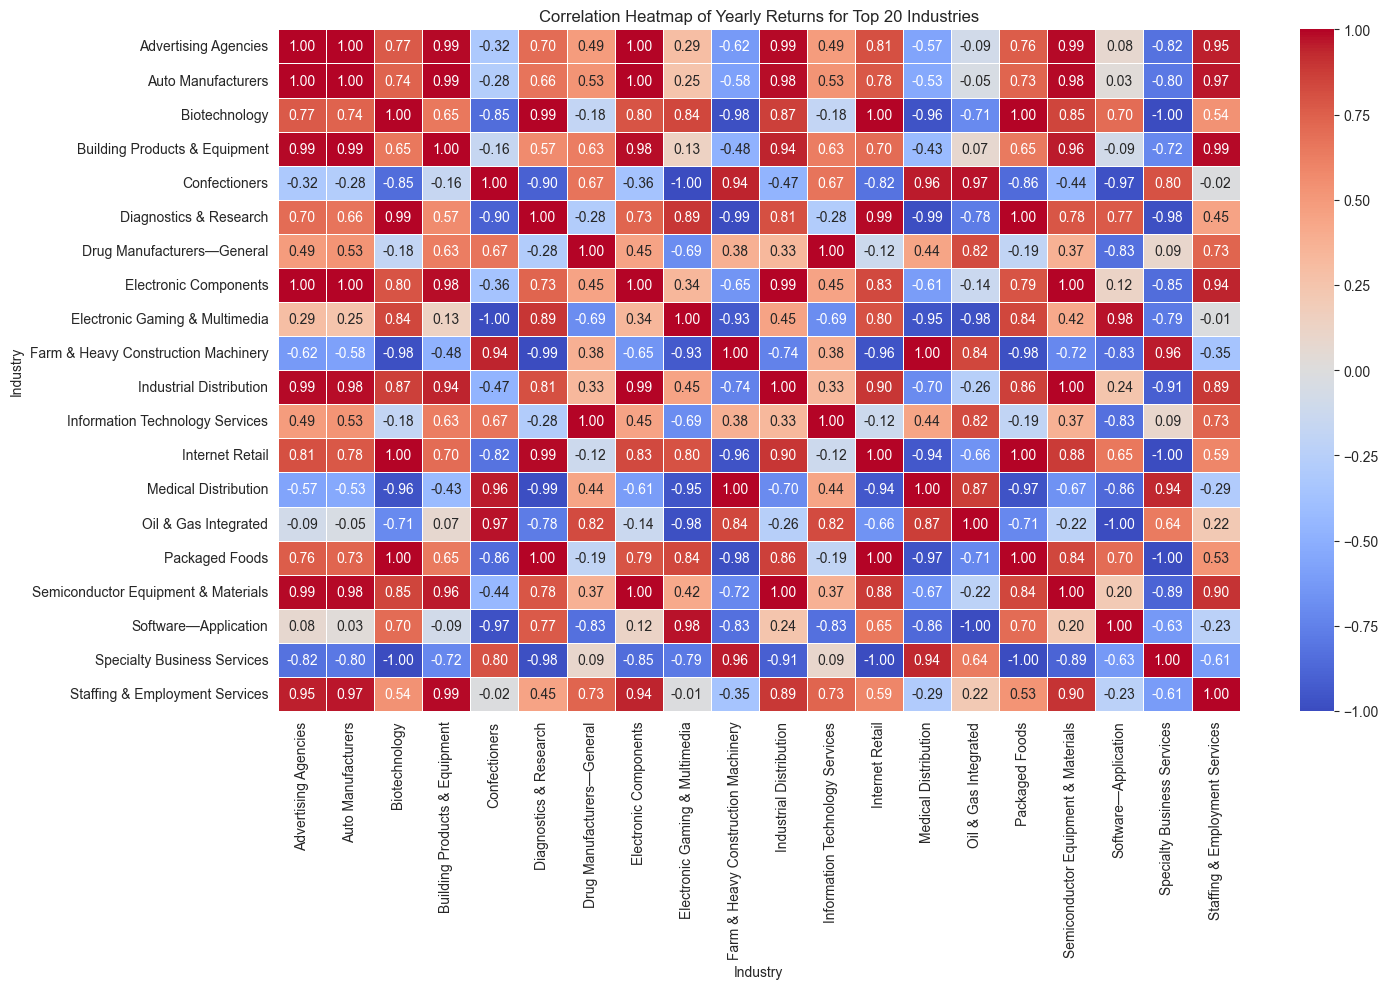

In [24]:
# Selecting top 20 industries based on their average yearly return
top_20_industries = yearly_returns.groupby('Industry')['Yearly_Return'].mean().nlargest(20).index

# Filtering the yearly returns dataframe to only include these top industries
filtered_yearly_returns = yearly_returns[yearly_returns['Industry'].isin(top_20_industries)]

# Calculating the correlation matrix for these industries
correlation_matrix_top_20 = filtered_yearly_returns.pivot(index='Year', columns='Industry', values='Yearly_Return').corr()

# Plotting the correlation heatmap for the top 20 industries
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_top_20, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Yearly Returns for Top 20 Industries')
plt.tight_layout()
plt.show()
